In [255]:
#fix weird branch stuff
#download libraries
%pip install Pillow
%pip install tensorflow opencv-python matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [256]:
import tensorflow as tf
import os

In [257]:

gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [258]:
print(tf.config.list_physical_devices('GPU'))

[]


In [259]:
import cv2
import imghdr

In [260]:
data_dir = 'data' 

In [261]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [262]:
labels = []
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
            else: 
                labels.append(image_class)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

In [263]:
#2 Load Data

import numpy as np
from matplotlib import pyplot as plt

In [264]:
#build data pipeline
data = tf.keras.utils.image_dataset_from_directory(folder_path)

Found 943 files belonging to 3 classes.


In [265]:
#access generator from data pipeline
#data_iterator = data.as_numpy_iterator()

In [266]:
#resizes image to fit the batch, 
#batch = data_iterator.next()

In [267]:
#show array of league of legends, vs destiny (we can tell by the sample of images that league is 1 and destiny is 0)
#class 1 = league
#class 0 = destiny
#batch[0] is all the images
#batch[1] are labels
#batch[1]

In [268]:
#3 preprocess data
#applies the scaling while the data is being loaded
data = data.map(lambda x,y: (x/255, y))
scaled_iterator = data.as_numpy_iterator()
batch = scaled_iterator.next()

In [269]:
#batch[0][0][0]

In [270]:
#from sklearn.preprocessing import MultiLabelBinarizer
#mlb = MultiLabelBinarizer()

#for x in range(len(batch[0][0])):
    #batch[0][0][x] = mlb.fit_transform(batch[0][0][x])
#list(mlb.classes_)
#batch[0][0][0]

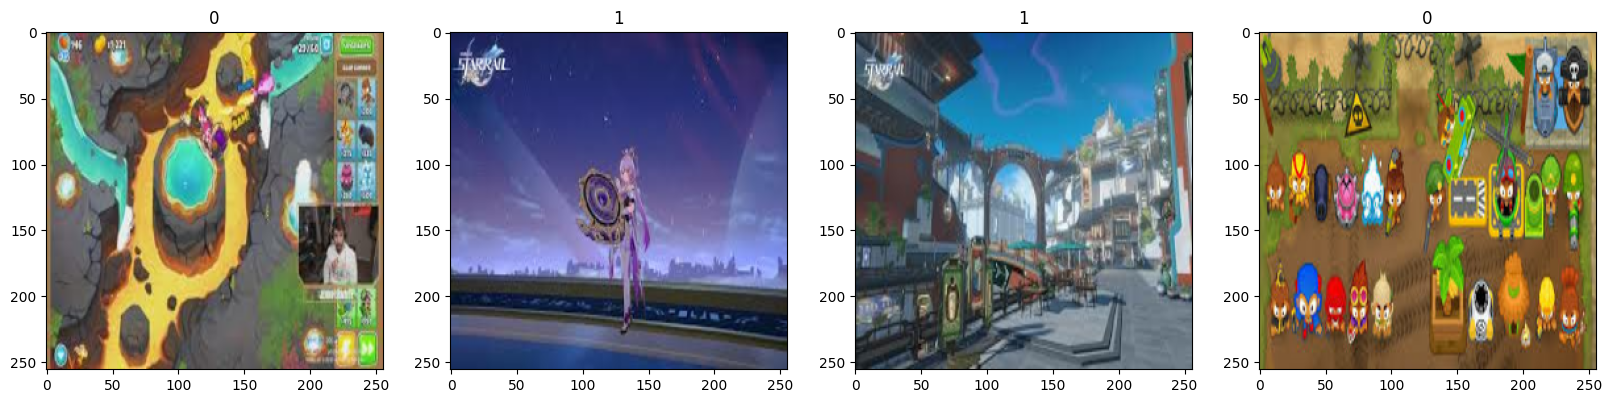

In [271]:
#visualize data with matplotlib
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [272]:
len(data)

30

In [273]:
#Split data into training, validation and testing
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [274]:
#ensure that values add up into the length of the batches
train_size+val_size+test_size

30

In [275]:
#make sure data is shuffled before, in this case we already have shuffled the data with initial batch
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

In [276]:
#Sequential models great if you have one data input and one data output
#functional api is better if you have multiple inputs and multiple outputs
from tensorflow.keras.models import Sequential

#Conv2d is a 2d convolution layer (spatial convolution over images)
#maxpooling2d condenses all the values in a region and returns max
#Flatten turns convolution into a format that dense can understand
#dropout for regularization
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [277]:
#Establish model
model = Sequential()

In [278]:
#add neural network layers
#scans layers to detect data, 16 filters, 3 by 3 filter, move by 1 pixel each time
#pass all data into relu function to modify the output data
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
#return maximum value from the relu activation over a set region, reduce image data by half
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

#condense rows and width, numbers of filters will form channel value but we don't want channel value so flatten removes that
#condenses into a single dimension (rows * width * filters)
model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [279]:
#adam is a optimizer
import keras
model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

In [280]:
#shows application of every layer and the 
model.summary()


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)              │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

In [281]:
model

<Sequential name=sequential_6, built=True>

In [282]:
#Train data

logdir ='logs'

In [283]:
#save the model at a certain state
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [284]:
#plot out data
#train : training data
#epochs : how long we train for, 1 epoch is 1 run through data
#validation_data : run evaluation on validation data
#ideally we want to see loss go down and accuracy go up
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 6s 223ms/step - accuracy: 0.4976 - loss: 0.3759 - val_accuracy: 0.5312 - val_loss: -2.3967
Epoch 2/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 5s 211ms/step - accuracy: 0.5747 - loss: -4.8645 - val_accuracy: 0.5052 - val_loss: -37.8061
Epoch 3/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 5s 224ms/step - accuracy: 0.5871 - loss: -98.1644 - val_accuracy: 0.5729 - val_loss: -574.5107
Epoch 4/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 5s 213ms/step - accuracy: 0.5742 - loss: -1025.8860 - val_accuracy: 0.5469 - val_loss: -4427.1440
Epoch 5/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 5s 218ms/step - accuracy: 0.5755 - loss: -5874.6787 - val_accuracy: 0.5365 - val_loss: -11667.5498
Epoch 6/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 5s 213ms/step - accuracy: 0.5638 - loss: -18996.1426 - val_accuracy: 0.4896 - val_loss: -60082.5312
Epoch 7/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 5s 206ms/step - accuracy: 0.5753 - loss: -47982.1602 - val_accuracy: 0.5104 - val_loss: -125429.2734
Epoch 8/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 5s 212ms/step - acc

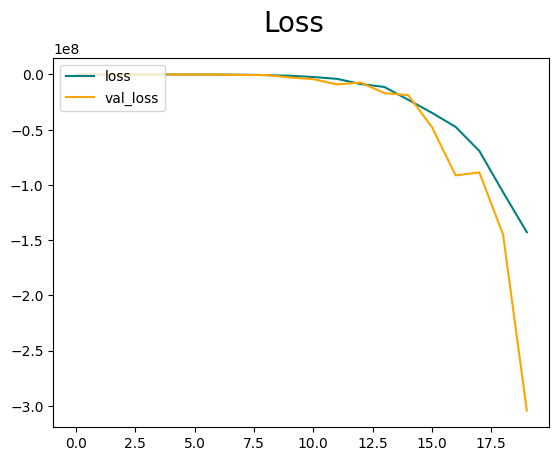

In [298]:
#plot performance

#plot loss metrics
fig = plt.figure()

#training loss is teal
plt.plot(hist.history['loss'], color='teal', label='loss')

#validation loss has orange color
#if val loss going up and loss going down it means model is overfitting, so apply regularization or change data
#if loss isn't decreasing at all, make a larger/sophisticated neural network or look again at training data
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

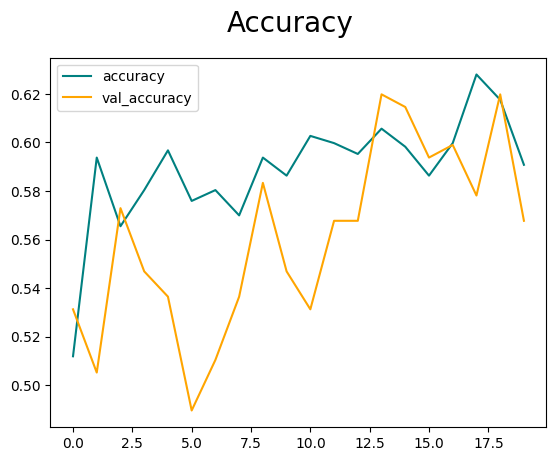

In [299]:
#visualize accuracy

fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [287]:
#evaluate metrics
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [288]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [289]:
#run through each batch in testing data
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


In [290]:
#print result
#higher values ensure that model works better
print(f'Precision:{pre.result().numpy()}, Recall:{ re.result().numpy()}, Accuracy{acc.result().numpy()}')

Precision:0.9154929518699646, Recall:0.9848484992980957, Accuracy0.5316455960273743


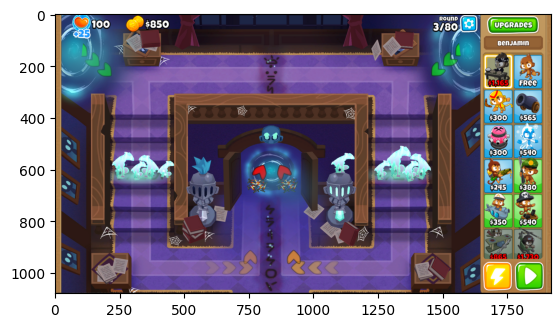

In [291]:
#test on new data
#uncomment lines below to test data
#img = cv2.imread('hsrt1.PNG')
img = cv2.imread('bloonst1.PNG')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

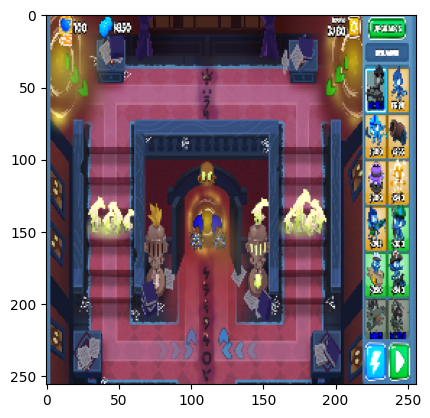

In [292]:
#resize image to throw into neural network
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [293]:
#throw into model
#put into list because model is taking batches and not taking singular lists
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


In [294]:
if yhat > 0.5: 
   print(f'Predicted class is honkai star rail')
else:
   print(f'Predicted class is bloons')

Predicted class is honkai star rail


In [295]:
#Save the model
#from tensorflow.keras.models import load_model

In [296]:
#model.save(os.path.join('models','hsrandbloonsidentifier.keras'))

In [297]:
#load the model
#new_model = load_model(os.path.join('models','gameidentifiermodel.h5'))